# Project Problem Statement:

<u>Customer Churn Prediction</u><br>
**A Bank wants to take care of customer retention for its product:** savings accounts.<br>
The bank wants you to identify customers likely to churn balances below the minimum balance. You have the customers information such as age, gender, demographics along with their transactions with the bank.

> Your task as a data scientist would be to predict the propensity to churn for each customer.

**<u>Data Dictionary</u>**

There are multiple variables in the dataset which can be cleanly divided into 3 categories:
1. Demographic information about customers
    - **customer_id** - Customer id 
    - **vintage** - Vintage of the customer with the bank in a number of days 
    - **age** - Age of customer 
    - **gender** - Gender of customer 
    - **dependents** - Number of dependents 
    - **occupation** - Occupation of the customer 
    - **city** - City of the customer (anonymized) 
2. Customer Bank Relationship
    - **customer_nw_category** - Net worth of customer (3: Low 2: Medium 1: High) 
    - **branch_code** - Branch Code for a customer account 
    - **days_since_last_transaction** - No of Days Since Last Credit in Last 1 year 
3. Transactional Information
    - **current_balance** - Balance as of today 
    - **previous_month_end_balance** - End of Month Balance of previous month 
    - **average_monthly_balance_prevQ** - Average monthly balances (AMB) in Previous Quarter 
    - **average_monthly_balance_prevQ2** - Average monthly balances (AMB) in previous to the previous quarter 
    - **current_month_credit** - Total Credit Amount current month 
    - **previous_month_credit** - Total Credit Amount previous month 
    - **current_month_debit** - Total Debit Amount current month 
    - **previous_month_debit** - Total Debit Amount previous month 
    - **current_month_balance** - Average Balance of current month 
    - **previous_month_balance** - Average Balance of previous month 
    - **churn** - Average balance of customer falls below minimum balance in the next quarter (1/0)

## Loading the Data

### Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### Loading the data

In [2]:
data = pd.read_csv('churn_prediction.csv')

### Data Exploratoin

In [3]:
data.shape

(28382, 21)

In [4]:
data.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,25919.000000,27579.000000,28382.000000,28382.000000,25159.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2364.336446,48.208336,0.347236,796.109576,2.225530,925.975019,69.997814,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,0.997661,432.872102,0.660443,937.799129,86.341098,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,0.000000,409.000000,2.000000,176.000000,11.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,15150.500000,2018.000000,46.000000,0.000000,834.000000,2.000000,572.000000,30.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,0.000000,1096.000000,3.000000,1440.000000,95.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,12899.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,365.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


In [5]:
data.head(50)

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
5,7,263,42,Female,0.0,self_employed,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
6,8,5922,72,Male,0.0,retired,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
7,9,1145,46,Male,0.0,self_employed,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0
8,10,2132,31,Male,0.0,salaried,1096.0,2,4110,19.0,...,1355.86,1702.44,1126.13,714.51,121.09,714.51,359.44,1183.45,1857.42,0
9,11,3379,40,Male,3.0,self_employed,1020.0,2,38,0.0,...,4244.38,2168.53,1864.33,6912.29,4206.13,1887.30,1348.85,1823.16,2416.69,0


In [6]:
temp = pd.DataFrame(index=data.columns)
temp['data_type'] = data.dtypes
temp['null_count'] = data.isnull().sum()
temp['unique_count'] = data.nunique()
temp

,data_type,null_count,unique_count
customer_id,int64,0,28382
vintage,int64,0,5473
age,int64,0,90
gender,object,525,2
dependents,float64,2463,15
occupation,object,80,5
city,float64,803,1604
customer_nw_category,int64,0,3
branch_code,int64,0,3185
days_since_last_transaction,float64,3223,360


### Preparation of the dataset

#### Changing dtypes of `churn` and `customer_nw_category` to appropriate type.

In [7]:
data = data.astype({'customer_nw_category': 'object'})

In [8]:
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category               object
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [9]:
temp = pd.DataFrame(index=data.columns)
temp['data_type'] = data.dtypes
temp['null_count'] = data.isnull().sum()
temp['unique_count'] = data.nunique()
temp

,data_type,null_count,unique_count
customer_id,int64,0,28382
vintage,int64,0,5473
age,int64,0,90
gender,object,525,2
dependents,float64,2463,15
occupation,object,80,5
city,float64,803,1604
customer_nw_category,object,0,3
branch_code,int64,0,3185
days_since_last_transaction,float64,3223,360


#### Dropping unwanted columns

In [10]:
data = data.drop(['city', 'branch_code', 'customer_id'], axis=1)

In [11]:
temp = pd.DataFrame(index=data.columns)
temp['data_type'] = data.dtypes
temp['null_count'] = data.isnull().sum()
temp['unique_count'] = data.nunique()
temp

,data_type,null_count,unique_count
vintage,int64,0,5473
age,int64,0,90
gender,object,525,2
dependents,float64,2463,15
occupation,object,80,5
customer_nw_category,object,0,3
days_since_last_transaction,float64,3223,360
current_balance,float64,0,27903
previous_month_end_balance,float64,0,27922
average_monthly_balance_prevQ,float64,0,27801


#### Displaying all the categories of categorical variables

In [12]:
data.columns

Index(['vintage', 'age', 'gender', 'dependents', 'occupation',
       'customer_nw_category', 'days_since_last_transaction',
       'current_balance', 'previous_month_end_balance',
       'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2',
       'current_month_credit', 'previous_month_credit', 'current_month_debit',
       'previous_month_debit', 'current_month_balance',
       'previous_month_balance', 'churn'],
      dtype='object')

In [13]:
categorical_dtypes = ['gender', 'occupation', 'customer_nw_category', 'churn', 'dependents']
for i in categorical_dtypes:
    print('************ Value Count in', i, '************')
    print(data[i].value_counts())
    print('')

************ Value Count in gender ************
Male      16548
Female    11309
Name: gender, dtype: int64

************ Value Count in occupation ************
self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

************ Value Count in customer_nw_category ************
2    14559
3    10112
1     3711
Name: customer_nw_category, dtype: int64

************ Value Count in churn ************
0    23122
1     5260
Name: churn, dtype: int64

************ Value Count in dependents ************
0.0     21435
2.0      2150
1.0      1395
3.0       701
4.0       179
5.0        41
6.0         8
7.0         3
36.0        1
52.0        1
25.0        1
9.0         1
50.0        1
32.0        1
8.0         1
Name: dependents, dtype: int64



#### Imputing missing values

In [14]:
dataframe = data.copy()

In [15]:
mean_val = dataframe['days_since_last_transaction'].mean()
mean_val

69.99781390357327

In [16]:
dataframe['days_since_last_transaction'].fillna(value=mean_val, inplace=True)

In [17]:
dataframe.isnull().sum()

vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
customer_nw_category                 0
days_since_last_transaction          0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

#### Lets plot `occupation` vs `current balance` to take decision on how to impute the missing values.

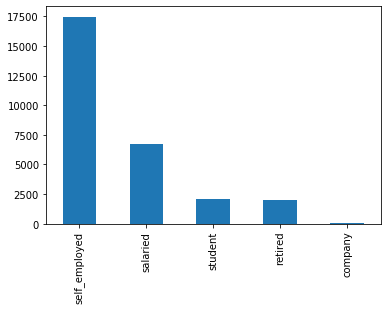

In [18]:
dataframe['occupation'].value_counts().plot(kind = 'bar')

#### Let's impute the mode of `occupation` with the missing values.

In [19]:
mode_val = dataframe['occupation'].mode()
mode_val[0]

'self_employed'

In [20]:
dataframe['occupation'].fillna(value = mode_val[0], inplace=True)

In [21]:
dataframe.isnull().sum()

vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                           0
customer_nw_category                 0
days_since_last_transaction          0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

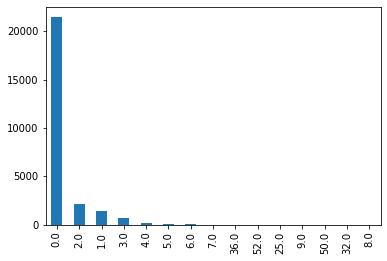

In [22]:
dataframe['dependents'].value_counts().plot(kind = 'bar')

In [23]:
checktest = dataframe[dataframe['occupation']=='self_employed']
checktest.head(10)

,vintage,age,gender,dependents,occupation,customer_nw_category,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,3135,66,Male,0.0,self_employed,2,224.000000,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,310,35,Male,0.0,self_employed,2,60.000000,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
3,478,90,NaN,NaN,self_employed,2,147.000000,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,2531,42,Male,2.0,self_employed,3,58.000000,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
5,263,42,Female,0.0,self_employed,2,60.000000,15202.20,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
7,1145,46,Male,0.0,self_employed,2,172.000000,10096.58,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0
9,3379,40,Male,3.0,self_employed,2,0.000000,4957.95,4244.38,2168.53,1864.33,6912.29,4206.13,1887.30,1348.85,1823.16,2416.69,0
14,2314,48,Female,0.0,self_employed,2,52.000000,5431.42,5489.14,6532.99,7720.34,0.66,661.73,0.66,2811.53,5437.04,6633.94,1
15,1934,51,Female,0.0,self_employed,3,69.997814,2010.98,1994.84,1829.43,2415.57,0.16,0.16,128.66,360.70,1960.91,1840.23,0
16,2723,49,Male,0.0,self_employed,3,0.000000,1448.49,3183.27,3021.27,1710.93,190.71,113.64,2461.66,1257.41,1950.95,3127.00,1


In [24]:
for i in range(0, len(dataframe)):
    if pd.isnull(dataframe['dependents'][i])==True:
        if (dataframe['occupation'][i] == 'retired'):
            dataframe['dependents'][i] = 0.0
        elif(dataframe['occupation'][i] == 'student'):
            dataframe['dependents'][i] = 0.0
        elif(dataframe['occupation'])[i] == 'salaried':
            dataframe['dependents'][i] = 1.0
        else:
            dataframe['dependents'][i] = 1.0

In [25]:
dataframe.isnull().sum()

vintage                             0
age                                 0
gender                            525
dependents                          0
occupation                          0
customer_nw_category                0
days_since_last_transaction         0
current_balance                     0
previous_month_end_balance          0
average_monthly_balance_prevQ       0
average_monthly_balance_prevQ2      0
current_month_credit                0
previous_month_credit               0
current_month_debit                 0
previous_month_debit                0
current_month_balance               0
previous_month_balance              0
churn                               0
dtype: int64

#### Let's drop the `gender` column

In [26]:
dataframe = dataframe.drop(['gender'], axis=1)

In [27]:
dataframe.shape

(28382, 17)

In [28]:
dataframe.isnull().sum()

vintage                           0
age                               0
dependents                        0
occupation                        0
customer_nw_category              0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

### Dealing with categorical variable

In [29]:
dataframe.dtypes

vintage                             int64
age                                 int64
dependents                        float64
occupation                         object
customer_nw_category               object
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [30]:
dataframe = pd.get_dummies(dataframe)

In [31]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   vintage                         28382 non-null  int64  
 1   age                             28382 non-null  int64  
 2   dependents                      28382 non-null  float64
 3   days_since_last_transaction     28382 non-null  float64
 4   current_balance                 28382 non-null  float64
 5   previous_month_end_balance      28382 non-null  float64
 6   average_monthly_balance_prevQ   28382 non-null  float64
 7   average_monthly_balance_prevQ2  28382 non-null  float64
 8   current_month_credit            28382 non-null  float64
 9   previous_month_credit           28382 non-null  float64
 10  current_month_debit             28382 non-null  float64
 11  previous_month_debit            28382 non-null  float64
 12  current_month_balance           

In [32]:
dataframe

,vintage,age,dependents,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,...,previous_month_balance,churn,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student,customer_nw_category_1,customer_nw_category_2,customer_nw_category_3
0,3135,66,0.0,224.000000,1458.71,1458.71,1458.71,1449.07,0.20,0.20,...,1458.71,0,0,0,0,1,0,0,1,0
1,310,35,0.0,60.000000,5390.37,8704.66,7799.26,12419.41,0.56,0.56,...,8787.61,0,0,0,0,1,0,0,1,0
2,2356,31,0.0,69.997814,3913.16,5815.29,4910.17,2815.94,0.61,0.61,...,5070.14,0,0,0,1,0,0,0,1,0
3,478,90,1.0,147.000000,2291.91,2291.91,2084.54,1006.54,0.47,0.47,...,1669.79,1,0,0,0,1,0,0,1,0
4,2531,42,2.0,58.000000,927.72,1401.72,1643.31,1871.12,0.33,714.61,...,1677.16,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,1845,10,0.0,70.000000,1076.43,1076.43,2282.19,2787.70,0.30,0.30,...,1076.43,0,0,0,0,0,1,0,1,0
28378,4919,34,0.0,14.000000,3844.10,4069.21,3668.83,3865.55,1.71,2.29,...,3690.32,0,0,0,0,1,0,0,1,0
28379,297,47,0.0,0.000000,65511.97,61017.55,53444.81,21925.81,4666.84,3883.06,...,57564.24,1,0,0,1,0,0,0,1,0
28380,2585,50,3.0,69.997814,1625.55,1625.55,1683.20,1857.42,0.20,0.20,...,1625.55,0,0,0,0,1,0,0,0,1


### Model

In [33]:
#seperating independent and dependent variables

x = dataframe.drop(['churn'], axis=1)
y = dataframe['churn']

#### Scalling the dataframe using minmax scaler

In [34]:
# ## Importing the MinMax Scaler
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# x_scaled = scaler.fit_transform(x)

In [35]:
# ## Scaling
# x = pd.DataFrame(x_scaled, columns = x.columns)

In [36]:
from sklearn.model_selection import train_test_split
train_x,valid_x,train_y,valid_y = train_test_split(x,y, random_state = 101, stratify=y)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [38]:
model1 = LogisticRegression()
model1.fit(train_x,train_y)
pred1=model1.predict(valid_x)
pred1[:10], model1.score(valid_x, valid_y)

(array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0]), 0.8356820744081173)

In [39]:
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(train_x,train_y)
pred2=model2.predict(valid_x)
pred2[:10], model2.score(valid_x, valid_y)

(array([0, 1, 1, 1, 0, 0, 0, 1, 1, 0]), 0.8475197294250282)

In [40]:
model3 = DecisionTreeClassifier(max_depth=7)
model3.fit(train_x,train_y)
pred3=model3.predict(valid_x)
pred3[:10], model3.score(valid_x, valid_y)

(array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0]), 0.8580890642615558)

In [41]:
from statistics import mode
final_pred = np.array([])
for i in range(0,len(valid_x)):
    final_pred = np.append(final_pred, mode([pred1[i], pred2[i], pred3[i]]))

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
accuracy_score(valid_y, final_pred)

0.8565388951521984

In [44]:
accuracy_score(valid_y, pred1), accuracy_score(valid_y, pred2), accuracy_score(valid_y, pred3)

(0.8356820744081173, 0.8475197294250282, 0.8580890642615558)

In [46]:
import jovian

In [47]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "manishshah120/final-project" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/manishshah120/final-project


'https://jovian.ml/manishshah120/final-project'

# The End